In [1]:
import pandas as pd
import re
import string
import numpy as np
from gensim import matutils, models
import scipy.sparse
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

[nltk_data] Downloading package stopwords to /home/eliza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/eliza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
podcasts=['Fighter_and_the_Kid', 'Two_Bears_One_Cave', 'Bad_Friends', 'This_Past_Weekend', 
          'Good_for_you', 'You_Up', 'Joe_Rogan_Experience', 'Church_of_whats_Happening_Now', 
          'Skeptic_Tank'] 
transcripts=[['fatk1.txt','fatk2.txt','fatk3.txt'], ['tboc1.txt', 'tboc2.txt','tboc3.txt'],
             ['bf1.txt', 'bf2.txt','bf3.txt'],['tpw1.txt', 'tpw2.txt','tpw2.txt'],['gfy1.txt','gfy2.txt', 'gfy3.txt'], 
             ['yu1.txt','yu2.txt','yu3.txt'], ['jr1.txt','jr2.txt', 'jr3.txt'],['cwhn1.txt','cwhn2.txt','cwhn3.txt'],
             ['st1.txt','st2.txt', 'st3.txt']]
data = {}

for i, p in enumerate(podcasts):
    data_list=[]
    for r in range(3):
        #print(r)
        with open(transcripts[i][r]) as file:
            fr=file.read()
            ########################
        count=0
        for z in range (0, len (fr)):   
#Checks whether given character is a punctuation mark 
            #count=0
            if fr[z] in ('!' , ".","?"):  
                count = count + 1;  
                #print (count)

        t=int(count/3)


        val = -1
        x=0
        t=t
        for zz in range(0, t): 
            val = fr.find('.', val + 1) 

        fr1=fr[:val+1]
        fr2=fr[val+1:]
        #count=0
        for zzz in range (0, len (fr2)):   
            #Checks whether given character is a punctuation mark  
            if fr2[zzz] in ('!' , ".","?"):  
                count = count + 1;  
        #print (count)

        t=int(count/2)
        val = -1
        t=t
        for zzzz in range(0, t): 
            val = fr2.find('.', val + 1) 

        fr3=fr2[:val+1]
        fr4=fr2[val+1:]

        data_list.append(fr1)
        data_list.append(fr3)
        data_list.append(fr4)

    data[p] = data_list
        
       


        
for i, p in enumerate(podcasts):
    data_list=[]
    for r in range(3):
        with open(transcripts[i][r]) as file:
            fr=file.read()
            
            data_list.append(fr)
    data[p] = data_list

In [4]:
pd.set_option('max_colwidth',140)

back_up_df = pd.DataFrame.from_dict(data, orient='index').transpose()
#data_df.columns = ['Transcript']
#data_df = data_df.sort_index()

# Print the Corpus
#back_up_df

In [5]:

pd.set_option('max_colwidth',140)

data_df = pd.DataFrame.from_dict(data, orient='index').transpose()
#data_df.columns = ['Transcript']
#data_df = data_df.sort_index()

# Print the Corpus
data_df

Fighter_and_the_Kid  \
0  Good news everybody this week on it has 25% off all their supplements mouth brand Alpha Brain instant. You had new mood melatonin spray ...   
1   It seems like quite a bit. Thanks cream. And if you're counting calories exploding ice cream fuck off, right?\nYou need to covid eat yo...   
2   He's just so pretty is he?\nYeah, it was beautiful eyes. Yeah full mouth. Round-faced I finished Hunters on Amazon the ending with the ...   
3  Not many men can withstand my punch punch just obviously obviously a for sure got a said I've got a set of here on them black belts and ...   
4   You know what? That's my camera.\nWhich one's mine. That was the only way we had worked on in your face because you look tight. Right. ...   
5   I do. I bleed just like everybody else and I cry and and I you ever tried tear leather in half. Yeah, you can't impossible. That's your...   
6  Hey Beatrice, I just announced I'm headed to Austin. I'm head loss in March 19th through the 21st capcity baby. He'll be at the Arab Cit...   
7   Just wait. Yeah. That's a football thighs. It's name is it looks super mad all the time. Just wait till he gets cute. Yeah, I don't fix...   
8   Also you get 10% off go to Pure Spectrum CBD. Com promo.\nShop, you temps off the whole damn sight. They just dropped the New Black Lab...   

                                                                                                                            Two_Bears_One_Cave  \
0  The show in the making Welcome to another episode of two bears one cave. I'm Tom Segura. He's Bert. Kakuka Kreischer and trying to get a...   
1   I'm if anything I'm vindictive right if anything.\nThere's a woman who one time told a lie about Georgia. Um, that woman's not doing so...   
2   I mean, yeah, my dad would love it. If we fucking great my dad by the way, he'll kill say things like he was people love to hear me spe...   
3  The show in the making You can't just oh my God, you fucking cunt. You're such a god going what what neighborhoods people live in that's...   
4   And there's also a lot of guys that are really talented and do work hard but they didn't get the one thing. They didn't capitalize on t...   
5   I don't want to I just want the text of everyone saying they love me and they hope I get better. That's all.\nBe alive last night was a...   
6  This podcast is brought to you by policy genius. It's year 2020 ad and finally we get to live in this futuristic Utopia. We've all been ...   
7   I could get into that. I like I mean, I like watches but I mean the racing I could get into because I do feel such a thrill and it's um...   
8   I didn't see New York really know Oklahoma and New York City and Sylvania in Washington.\nWell, we didn't get it. All right. God dang i...   

                                                                                                                                   Bad_Friends  \
0  I had my grandparents like two years I've made since I was 19 and I'm 23 now and my brother was on Tumblr because he was going through a...   
1  \nDon't look Chloe. Let me tell you something. We love you. You are going to find love I want to say this to everybody out there. Her na...   
2   Yeah. Not fucking touch me touch me and also you should have taken your pants off. You should have I believe the shit doubled. Yeah act...   
3  We're taking iPhone pictures while your dad was dead. My mom wanted it dude, Korean. People are so fucking that's so weird.\nYou two are...   
4   All right, you can tell me what if there was a scene where Paul he's in this Bungalow and he's just kind of like his character is just ...   
5   Is that her? Yeah, that's her. So now you would you would he could get her? Okay. I don't want to I don't want to offend either of thes...   
6  Hey, do you want to see some bad friends and click the link below? Click on the link below to subscribe to the bad friends Clips page so...   
7   I know that's like one bite o

In [6]:

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\.', ' ', text)
    text = re.sub('\,', '', text)
    text = re.sub('\'', '', text)
    text = re.sub('\%', '', text)
    text = re.sub('\?', ' ', text)
    text = re.sub('\!', ' ', text)
    text = re.sub('\-', '', text)
    text = re.sub('\/', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Remove square brackets
round1 = lambda x: clean_text(x)

In [7]:
dft=data_df.transpose()

In [8]:
data_df.columns

Index(['Fighter_and_the_Kid', 'Two_Bears_One_Cave', 'Bad_Friends',
       'This_Past_Weekend', 'Good_for_you', 'You_Up', 'Joe_Rogan_Experience',
       'Church_of_whats_Happening_Now', 'Skeptic_Tank'],
      dtype='object')

In [9]:
data_df['Fighter_and_the_Kid']=data_df.Fighter_and_the_Kid.apply(round1)
data_df['Two_Bears_One_Cave']=data_df.Two_Bears_One_Cave.apply(round1)
data_df['Bad_Friends']=data_df.Bad_Friends.apply(round1)
data_df['This_Past_Weekend']=data_df.This_Past_Weekend.apply(round1)
data_df['Good_for_you']=data_df.Good_for_you.apply(round1)
data_df['You_Up']=data_df.You_Up.apply(round1)
data_df['Joe_Rogan_Experience']=data_df.Joe_Rogan_Experience.apply(round1)
data_df['Church_of_whats_Happening_Now']=data_df.Church_of_whats_Happening_Now.apply(round1)
data_df['Skeptic_Tank']=data_df.Skeptic_Tank.apply(round1)

In [10]:
data_df

Fighter_and_the_Kid  \
0  good news everybody this week on it has  off all their supplements mouth brand alpha brain instant  you had new mood melatonin spray you...   
1   it seems like quite a bit  thanks cream  and if youre counting calories exploding ice cream fuck off right you need to covid eat your g...   
2   hes just so pretty is he yeah it was beautiful eyes  yeah full mouth  roundfaced i finished hunters on amazon the ending with the endin...   
3  not many men can withstand my punch punch just obviously obviously a for sure got a said ive got a set of here on them black belts and c...   
4   you know what  thats my camera which ones mine  that was the only way we had worked on in your face because you look tight  right  no n...   
5   i do  i bleed just like everybody else and i cry and and i you ever tried tear leather in half  yeah you cant impossible  thats your fa...   
6  hey beatrice i just announced im headed to austin  im head loss in march  through the  capcity baby  hell be at the arab city partners  ...   
7   just wait  yeah  thats a football thighs  its name is it looks super mad all the time  just wait till he gets cute  yeah i dont fix my ...   
8   also you get  off go to pure spectrum cbd  com promo shop you temps off the whole damn sight  they just dropped the new black label and...   

                                                                                                                            Two_Bears_One_Cave  \
0  the show in the making welcome to another episode of two bears one cave  im tom segura  hes bert  kakuka kreischer and trying to get all...   
1   im if anything im vindictive right if anything theres a woman who one time told a lie about georgia  um that womans not doing so hot no...   
2   i mean yeah my dad would love it  if we fucking great my dad by the way hell kill say things like he was people love to hear me speak l...   
3  the show in the making you cant just oh my god you fucking cunt  youre such a god going what what neighborhoods people live in thats dis...   
4   and theres also a lot of guys that are really talented and do work hard but they didnt get the one thing  they didnt capitalize on that...   
5   i dont want to i just want the text of everyone saying they love me and they hope i get better  thats all be alive last night was an in...   
6  this podcast is brought to you by policy genius  its year  ad and finally we get to live in this futuristic utopia  weve all been hearin...   
7   i could get into that  i like i mean i like watches but i mean the racing i could get into because i do feel such a thrill and its um i...   
8   i didnt see new york really know oklahoma and new york city and sylvania in washington well we didnt get it  all right  god dang it tho...   

                                                                                                                                   Bad_Friends  \
0  i had my grandparents like two years ive made since i was  and im  now and my brother was on tumblr because he was going through and he ...   
1  dont look chloe  let me tell you something  we love you  you are going to find love i want to say this to everybody out there  her name ...   
2   yeah  not fucking touch me touch me and also you should have taken your pants off  you should have i believe the shit doubled  yeah act...   
3  were taking iphone pictures while your dad was dead  my mom wanted it dude korean  people are so fucking thats so weird you two are bad ...   
4   all right you can tell me what if there was a scene where paul hes in this bungalow and hes just kind of like his character is just kin...   
5   is that her  yeah thats her  so now you would you would he could get her  okay  i dont want to i dont want to offend either of these pe...   
6  hey do you want to see some bad friends and click the link below  click on the link below to subscribe to the bad friends clips page so ...   
7   i know thats like one bite of

In [11]:
data_df['Skeptic_Tank'][8]

'she was oh thats such a good kick right off the bat as good  shes the face of all faces and now right now for the first first time ever as of only a couple of weeks ago she turns hell bailey no way  yeah what she has but she still friendly and cute with doug  she came she kind of like toes the line it because people like like her but she has to have a heel persona now so she has to cheat and be a little bit like of a scab cheap shots this and that shots  no one likes that makes it hell right  yeah  thats the sign of a heel oh fuck shes doing straight punches  im right there  im literally right there  im right behind greg the announcer right here  so so cool  do you still get off on singer self on camera  i have more fun seeing myself behind a new sitting some sitting in the first row wrestling event where im not supposed to be on it  then my own show my own shows like my own home videos  i dont give a shit when i see myself as part of another institution or something thats established

In [12]:
all_stopwords = stopwords.words('english')

In [13]:
data_clean = pd.DataFrame({'fatk1':[data_df.Fighter_and_the_Kid[0]],
'fatk2':[data_df.Fighter_and_the_Kid[1]],
'fatk3':[data_df.Fighter_and_the_Kid[2]],
'fatk4':[data_df.Fighter_and_the_Kid[3]],'fatk5':[data_df.Fighter_and_the_Kid[4]],
    'fatk6':[data_df.Fighter_and_the_Kid[5]],'fatk7':[data_df.Fighter_and_the_Kid[6]],
    'fatk8':[data_df.Fighter_and_the_Kid[7]], 'fatk9':[data_df.Fighter_and_the_Kid[8]],
                           
'bf1':[data_df.Bad_Friends[0]],
'bf2': [data_df.Bad_Friends[1]],
'bf3': [data_df.Bad_Friends[2]],
'bf4':[data_df.Bad_Friends[3]],
'bf5': [data_df.Bad_Friends[4]],
'bf6': [data_df.Bad_Friends[5]],'bf7':[data_df.Bad_Friends[6]],
'bf8': [data_df.Bad_Friends[7]],
'bf9': [data_df.Bad_Friends[8]],
                           
'tboc1':[data_df.Two_Bears_One_Cave[0]],
'tboc2':[data_df.Two_Bears_One_Cave[1]],
'tboc3':[data_df.Two_Bears_One_Cave[2]],
'tboc4':[data_df.Two_Bears_One_Cave[3]],
'tboc5':[data_df.Two_Bears_One_Cave[4]],
'tboc6':[data_df.Two_Bears_One_Cave[5]],
'tboc7':[data_df.Two_Bears_One_Cave[6]],
'tboc8':[data_df.Two_Bears_One_Cave[7]],
'tboc9':[data_df.Two_Bears_One_Cave[8]],
                           

'tpw1':[data_df.This_Past_Weekend[0]],
'tpw2':[data_df.This_Past_Weekend[1]],
'tpw3':[data_df.This_Past_Weekend[2]],
'tpw4':[data_df.This_Past_Weekend[3]],
'tpw5':[data_df.This_Past_Weekend[4]],
'tpw6':[data_df.This_Past_Weekend[5]],
'tpw7':[data_df.This_Past_Weekend[6]],
'tpw8':[data_df.This_Past_Weekend[7]],
'tpw9':[data_df.This_Past_Weekend[8]],
                           
                           
'gfy1':[data_df.Good_for_you[0]],
'gfy2':[data_df.Good_for_you[1]],
'gfy3':[data_df.Good_for_you[2]],
'gfy4':[data_df.Good_for_you[3]],
'gfy5':[data_df.Good_for_you[4]],
'gfy6':[data_df.Good_for_you[5]],
'gfy7':[data_df.Good_for_you[6]],
'gfy8':[data_df.Good_for_you[7]],
'gfy9':[data_df.Good_for_you[8]],
                           
'yu1':[data_df.You_Up[0]],
'yu2':[data_df.You_Up[1]],
'yu3':[data_df.You_Up[2]],
'yu4':[data_df.You_Up[3]],
'yu5':[data_df.You_Up[4]],
'yu6':[data_df.You_Up[5]],
'yu7':[data_df.You_Up[6]],
'yu8':[data_df.You_Up[7]],
'yu9':[data_df.You_Up[8]],

'jre1':[data_df.Joe_Rogan_Experience[0]],
'jre2':[data_df.Joe_Rogan_Experience[1]],
'jre3':[data_df.Joe_Rogan_Experience[2]],
'jre4':[data_df.Joe_Rogan_Experience[3]],
'jre5':[data_df.Joe_Rogan_Experience[4]],
'jre6':[data_df.Joe_Rogan_Experience[5]],
'jre7':[data_df.Joe_Rogan_Experience[6]],
'jre8':[data_df.Joe_Rogan_Experience[7]],
'jre9':[data_df.Joe_Rogan_Experience[8]],
                           
'cwhn1':[data_df.Church_of_whats_Happening_Now[0]],
'cwhn2':[data_df.Church_of_whats_Happening_Now[1]],
'cwhn3':[data_df.Church_of_whats_Happening_Now[2]],
'cwhn4':[data_df.Church_of_whats_Happening_Now[3]],
'cwhn5':[data_df.Church_of_whats_Happening_Now[4]],
'cwhn6':[data_df.Church_of_whats_Happening_Now[5]],
'cwhn7':[data_df.Church_of_whats_Happening_Now[6]],
'cwhn8':[data_df.Church_of_whats_Happening_Now[7]],
'cwhn9':[data_df.Church_of_whats_Happening_Now[8]],
                           
'st1':[data_df.Skeptic_Tank[0]],
'st2':[data_df.Skeptic_Tank[1]],
'st3':[data_df.Skeptic_Tank[2]],
 'st4':[data_df.Skeptic_Tank[3]],
'st5':[data_df.Skeptic_Tank[4]],
'st6':[data_df.Skeptic_Tank[5]],
'st7':[data_df.Skeptic_Tank[6]],
'st8':[data_df.Skeptic_Tank[7]],
'st9':[data_df.Skeptic_Tank[8]]})

In [14]:
c_df=data_clean.transpose()

In [15]:
c_df.columns=['Transcript']

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize

def lemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        x=lemmatizer.lemmatize(word, pos="v")
        stem_sentence.append(lemmatizer.lemmatize(x))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

stem_tscrpt=[]
for i in range(81):
    stem_tscrpt.append(lemSentence(c_df.Transcript[i]))
c_df['TranLem']=stem_tscrpt

In [17]:

# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=all_stopwords, ngram_range=(1, 2) )
data_cv = cv.fit_transform(c_df.Transcript) # fit count vectorizor to our CLEAN transcript data

# Convert it to an array and label all the columns
# Can use this part for future projects
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = c_df.index

# Document-Term matrix
data_dtm


aa  aa grabbed  aa meeting  aa meetings  aa stare  aa started  aah  \
fatk1   0           0           0            0         0           0    0   
fatk2   0           0           0            0         0           0    0   
fatk3   0           0           0            0         0           0    0   
fatk4   0           0           0            0         0           0    0   
fatk5   0           0           0            0         0           0    0   
...    ..         ...         ...          ...       ...         ...  ...   
st5     0           0           0            0         0           0    0   
st6     0           0           0            0         0           0    0   
st7     0           0           0            0         0           0    0   
st8     1           0           0            0         0           1    0   
st9     0           0           0            0         0           0    0   

       aah bleep  aah yeah  aang  ...  zoos ridiculous  zoos things  zorbing  \
fatk1          0         0     0  ...                0            0        0   
fatk2          0         0     0  ...                0            0        0   
fatk3          0         0     0  ...                0            0        0   
fatk4          0         0     0  ...                0            0        0   
fatk5          0         0     0  ...                0            0        0   
...          ...       ...   ...  ...              ...          ...      ...   
st5            0         0     0  ...                0            0        0   
st6            0         0     0  ...                0            0        0   
st7            0         0     0  ...                0            0        0   
st8            0         0     0  ...                0            0        0   
st9            0         0     0  ...                0            0        0   

       zorbing band  zucchini  zucchini yes  zz  zz top  zzz  zzz sell  
fatk1             0         0             0   0       0    0         0  
fatk2             0         0             0   0       0    0         0  
fatk3             0         0             0   0       0    0         0  
fatk4             0         0             0   0       0    0         0  
fatk5             0         0             0   0       0    0         0  
...             ...       ...           ...  ..     ...  ...       ...  
st5               0         0             0   0       0    0         0  
st6               0         0             0   0       0    0         0  
st7               0         0             0   0       0    0         0  
st8               0         0             0   0       0    0         0  
st9               0         0             0   0       0    0         0  

[81 rows x 184351 columns]

In [18]:
all_stopwords = stopwords.words('english')
all_stopwords.append('like')
all_stopwords.append('policy genius')
all_stopwords.append('insurers')
all_stopwords.append('cash')
all_stopwords.append('app')
all_stopwords.append('cash app')
all_stopwords.append('jordan')
all_stopwords.append('bobby')
all_stopwords.append('kendall')
all_stopwords.append('annex')
all_stopwords.append('gues')
all_stopwords.append('shes')
all_stopwords.append('andrew')
all_stopwords.append('bert')
all_stopwords.append('insurer')
all_stopwords.append('austin')
all_stopwords.append('insurance')
all_stopwords.append('software')
all_stopwords.append('policy')
all_stopwords.append('sometimes')
all_stopwords.append('theo')
all_stopwords.append('somebody')
all_stopwords.append('everything')
all_stopwords.append('com')
all_stopwords.append('home')
all_stopwords.append('cbd')
all_stopwords.append('save')
all_stopwords.append('bring')
all_stopwords.append('better')
all_stopwords.append('bob')
all_stopwords.append('code')
all_stopwords.append('joe')
all_stopwords.append('jo')
all_stopwords.append('tom')
all_stopwords.append('cave')
all_stopwords.append('ever')
all_stopwords.append('undies')
all_stopwords.append('underwear')
all_stopwords.append('skillshare')
all_stopwords.append('dog')
all_stopwords.append('rogan')
all_stopwords.append('oyster')
all_stopwords.append('hey')
all_stopwords.append('month')
all_stopwords.append('october')
all_stopwords.append('minute')
all_stopwords.append('winnipeg')
all_stopwords.append('beth')
all_stopwords.append('israel')
all_stopwords.append('gang')
all_stopwords.append('damn')
all_stopwords.append('spring')
all_stopwords.append('baby')
all_stopwords.append('nine')
all_stopwords.append('scoliosis')
all_stopwords.append('place')
all_stopwords.append('sand')
all_stopwords.append('practice')
all_stopwords.append('spine')
all_stopwords.append('part')
all_stopwords.append('china')
all_stopwords.append('nazi')
all_stopwords.append('cherry')
all_stopwords.append('vanilla')
all_stopwords.append('whitney')
all_stopwords.append('shipstation')
all_stopwords.append('blue')
all_stopwords.append('pillow')
all_stopwords.append('ship')
all_stopwords.append('shaffir')
all_stopwords.append('ari')
all_stopwords.append('tara')
all_stopwords.append('idaho')
all_stopwords.append('christine')
all_stopwords.append('ha')
all_stopwords.append('anyway')
all_stopwords.append('jeremiah')
all_stopwords.append('funnel')
all_stopwords.append('doctor')
all_stopwords.append('seattle')
all_stopwords.append('york')
all_stopwords.append('church')
all_stopwords.append('juice')
all_stopwords.append('australia')
all_stopwords.append('cap')
all_stopwords.append('miu')
all_stopwords.append('car')
all_stopwords.append('joey')
all_stopwords.append('buffy')
all_stopwords.append('chloe')
all_stopwords.append('titanic')
all_stopwords.append('taylor')
all_stopwords.append('swift')
all_stopwords.append('comedy')
all_stopwords.append('everyone')
all_stopwords.append('comedian')
all_stopwords.append('neck')
all_stopwords.append('email')
all_stopwords.append('cat')
all_stopwords.append('patreon')
all_stopwords.append('frost')
all_stopwords.append('bro')
all_stopwords.append('bo')
all_stopwords.append('brother')
all_stopwords.append('onward')
all_stopwords.append('pothole')
all_stopwords.append('counselor')
all_stopwords.append('construction')
all_stopwords.append('send')
all_stopwords.append('cruz')
all_stopwords.append('toronto')
all_stopwords.append('inside')
all_stopwords.append('marker')
all_stopwords.append('skill')
all_stopwords.append('hotwire')
#all_stopwords.append('hair')
all_stopwords.append('sleep')
all_stopwords.append('trim')
all_stopwords.append('kiss')
all_stopwords.append('tiny')
all_stopwords.append('pornographer')
all_stopwords.append('shave')
all_stopwords.append('hair')
all_stopwords.append('whoop')
all_stopwords.append('phone')
all_stopwords.append('pd')

#kiss, animal, winter, tiny, beautiful, tongue, focus, springtime, catfish, chew


In [19]:
count_vectorizer = CountVectorizer( 
                                   stop_words=all_stopwords, token_pattern="\\b[a-z][a-z]+\\b", max_df=.75, min_df=.01)

count_vectorizer.fit(c_df.TranLem)

/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['genius'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVectorizer(max_df=0.75, min_df=0.01,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\b[a-z][a-z]+\\b')

In [20]:
doc_word = count_vectorizer.transform(c_df.TranLem).transpose()

In [21]:
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

0   1   2   3   4   5   6   7   8   9   ...  71  72  73  74  75  76  \
aa         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   
aah        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
aang       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
aardvark   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
aaron      0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   

          77  78  79  80  
aa         0   0   1   0  
aah        0   0   0   0  
aang       0   0   0   0  
aardvark   0   0   0   0  
aaron      0   0   0   0  

[5 rows x 81 columns]

In [22]:
doc_word.shape

(12770, 81)

In [23]:
corpus = matutils.Sparse2Corpus(doc_word)

In [24]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [25]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5, random_state=25)

In [26]:
lda.print_topics()

[(0,
  '0.008*"jew" + 0.006*"special" + 0.004*"dress" + 0.004*"charlie" + 0.003*"engage" + 0.003*"body" + 0.003*"excite" + 0.003*"wear" + 0.003*"wed" + 0.003*"woman"'),
 (1,
  '0.005*"comic" + 0.004*"club" + 0.004*"movie" + 0.004*"game" + 0.003*"shoot" + 0.003*"set" + 0.003*"video" + 0.003*"drink" + 0.002*"fight" + 0.002*"listen"'),
 (2,
  '0.004*"stage" + 0.004*"woman" + 0.004*"tv" + 0.004*"amaze" + 0.004*"wear" + 0.003*"set" + 0.003*"dad" + 0.003*"listen" + 0.003*"laugh" + 0.003*"black"'),
 (3,
  '0.003*"star" + 0.003*"black" + 0.003*"animal" + 0.003*"beautiful" + 0.003*"comic" + 0.003*"job" + 0.003*"porn" + 0.003*"high" + 0.003*"woman" + 0.003*"dad"'),
 (4,
  '0.014*"smoke" + 0.007*"cigarette" + 0.005*"dad" + 0.004*"eat" + 0.003*"laugh" + 0.003*"stage" + 0.003*"movie" + 0.003*"drink" + 0.003*"interest" + 0.003*"school"'),
 (5,
  '0.005*"movie" + 0.004*"wear" + 0.004*"read" + 0.003*"special" + 0.003*"body" + 0.003*"listen" + 0.003*"woman" + 0.003*"question" + 0.003*"fine" + 0.003*"in

In [27]:
lda_corpus = lda[corpus]
lda_corpus

In [28]:
lda_docs = [doc for doc in lda_corpus]

#Check out the document vectors in the topic space for the first 5 documents
lda_docs

# NMF tfid

In [29]:
vectorizer = TfidfVectorizer(stop_words=all_stopwords
                             , token_pattern="\\b[a-z][a-z]+\\b", max_df=.75)
tfidf = vectorizer.fit_transform(c_df.TranLem)

/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['genius'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [30]:
nmf = NMF(n_components=10, random_state=21).fit(tfidf)

/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [31]:
n_top_words = 10
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(", ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #0:
dad, cry, dead, movie, ball, molest, asian, free, woman, fame

Topic #1:
crab, pepper, pizza, ramsey, cauliflower, healthy, sausage, management, imagine, shock

Topic #2:
smoke, cigarette, weed, quit, smell, pack, popcorn, drink, outside, eat

Topic #3:
zoo, animal, sloth, illegal, zookeeper, circus, raise, special, hope, visitor

Topic #4:
winter, animal, beautiful, focus, catfish, springtime, chew, tongue, raven, louisiana

Topic #5:
comic, club, movie, shoot, stage, theater, store, set, line, listen

Topic #6:
jew, jewish, liberty, synagogue, community, mitzvah, dollar, holocaust, memory, ambient

Topic #7:
wrestle, fight, wrestler, storyline, wwe, heel, orton, smackdown, crowd, referee

Topic #8:
woman, sex, cheat, wear, interest, engage, dress, listen, anyone, date

Topic #9:
bike, gamble, video, test, game, team, trump, fight, amaze, train



Topic #0: Personal Experiences
--dad, cry, dead, movie, ball, molest, asian, free, woman, fame

Topic #1: Food 
--crab, pepper, pizza, ramsey, cauliflower, healthy, sausage, management, imagine, shock

Topic #2: Degenerate lifestyle
--smoke, cigarette, weed, quit, smell, pack, popcorn, drink, outside, eat

Topic #3: Animal Style
--zoo, animal, sloth, illegal, zookeeper, circus, raise, special, hope, visitor

Topic #4: Southern Charms
--winter, animal, beautiful, focus, springtime, catfish, chew, tongue, raven, louisiana

Topic #5: Showbiz
--comic, club, movie, shoot, stage, theater, store, set, line, listen

Topic #6: Judaism
--jew, jewish, liberty, synagogue, community, mitzvah, dollar, holocaust, memory, ambient

Topic #7: Professional Fighting
--wrestle, fight, wrestler, storyline, wwe, heel, orton, smackdown, crowd, referee

Topic #8: Relationships, female?
--woman, sex, cheat, wear, interest, engage, dress, listen, anyone, date

Topic #9: Dominate
--bike, gamble, video, test, game, team, trump, fight, amaze, train


In [32]:
topic_values = nmf.transform(tfidf)
topic_values.argmax(axis=1)

array([9, 9, 9, 5, 9, 5, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       9, 5, 9, 9, 0, 4, 8, 3, 4, 1, 3, 4, 1, 3, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 5, 9, 5, 9, 5, 9, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 6, 6, 6, 7, 7, 7])

In [33]:

c_df['Topic']=topic_values.argmax(axis=1)


In [34]:
c_df.head(20)

Transcript  \
fatk1  good news everybody this week on it has  off all their supplements mouth brand alpha brain instant  you had new mood melatonin spray you...   
fatk2   it seems like quite a bit  thanks cream  and if youre counting calories exploding ice cream fuck off right you need to covid eat your g...   
fatk3   hes just so pretty is he yeah it was beautiful eyes  yeah full mouth  roundfaced i finished hunters on amazon the ending with the endin...   
fatk4  not many men can withstand my punch punch just obviously obviously a for sure got a said ive got a set of here on them black belts and c...   
fatk5   you know what  thats my camera which ones mine  that was the only way we had worked on in your face because you look tight  right  no n...   
fatk6   i do  i bleed just like everybody else and i cry and and i you ever tried tear leather in half  yeah you cant impossible  thats your fa...   
fatk7  hey beatrice i just announced im headed to austin  im head loss in march  through the  capcity baby  hell be at the arab city partners  ...   
fatk8   just wait  yeah  thats a football thighs  its name is it looks super mad all the time  just wait till he gets cute  yeah i dont fix my ...   
fatk9   also you get  off go to pure spectrum cbd  com promo shop you temps off the whole damn sight  they just dropped the new black label and...   
bf1    i had my grandparents like two years ive made since i was  and im  now and my brother was on tumblr because he was going through and he ...   
bf2    dont look chloe  let me tell you something  we love you  you are going to find love i want to say this to everybody out there  her name ...   
bf3     yeah  not fucking touch me touch me and also you should have taken your pants off  you should have i believe the shit doubled  yeah act...   
bf4    were taking iphone pictures while your dad was dead  my mom wanted it dude korean  people are so fucking thats so weird you two are bad ...   
bf5     all right you can tell me what if there was a scene where paul hes in this bungalow and hes just kind of like his character is just kin...   
bf6     is that her  yeah thats her  so now you would you would he could get her  okay  i dont want to i dont want to offend either of these pe...   
bf7    hey do you want to see some bad friends and click the link below  click on the link below to subscribe to the bad friends clips page so ...   
bf8     i know thats like one bite of a corner will be sick  i ride but i ride  yeah if for an hour and then at the bottom itll say you only bu...   
bf9     i got it now and um and i think that and thats pretty much the conversation that i have with them  listen i hes not going to say sorry ...   
tboc1  the show in the making welcome to another episode of two bears one cave  im tom segura  hes bert  kakuka kreischer and trying to get all...   
tboc2   im if anything im vindictive right if anything theres a woman who one time told a lie about georgia  um that womans not doing so hot no...   

                                                                                                                                           TranLem  \
fatk1  good news everybody this week on it have off all their supplement mouth brand alpha brain instant you have new mood melatonin spray you ...   
fatk2  it seem like quite a bite thank cream and if youre count calorie explode ice cream fuck off right you need to covid eat your goddamn pan...   
fatk3  he just so pretty be he yeah it be beautiful eye yeah full mouth roundfaced i finish hunter on amazon the end with the end be have you s...   
fatk4  not many men can withstand my punch punch just obviously obviously a for sure get a say ive get a set of here on them black belt and chi...   
fatk5  you know what thats my camera which one mine that be the only way we have work on in your face because you look tight right no no it tha...   
fatk6  i do i bleed just like everybody else and i cry and and i you ever try tear le

# Sentiment

In [37]:
names=['Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid','Fighter and the Kid',
'Bad Friends','Bad Friends','Bad Friends','Bad Friends','Bad Friends','Bad Friends','Bad Friends','Bad Friends','Bad Friends',
'2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave','2 Bears 1 Cave',
'This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','This Past Weekend','Good For You','Good For You',
'Good For You','Good For You','Good For You','Good For You','Good For You','Good For You','Good For You', 'You Up','You Up','You Up','You Up','You Up','You Up','You Up','You Up','You Up','Joe Rogan Experience',
'Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Joe Rogan Experience','Church of whats Happening Now',
'Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now','Church of whats Happening Now',
'Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank','Skeptic Tank']

In [38]:
c_df['Names'] = names

In [39]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply a function along an axis of the DataFrame.
c_df['Polarity'] = c_df['Transcript'].apply(pol)
c_df['Subjectivity'] = c_df['Transcript'].apply(sub)
c_df

Transcript  \
fatk1  good news everybody this week on it has  off all their supplements mouth brand alpha brain instant  you had new mood melatonin spray you...   
fatk2   it seems like quite a bit  thanks cream  and if youre counting calories exploding ice cream fuck off right you need to covid eat your g...   
fatk3   hes just so pretty is he yeah it was beautiful eyes  yeah full mouth  roundfaced i finished hunters on amazon the ending with the endin...   
fatk4  not many men can withstand my punch punch just obviously obviously a for sure got a said ive got a set of here on them black belts and c...   
fatk5   you know what  thats my camera which ones mine  that was the only way we had worked on in your face because you look tight  right  no n...   
...                                                                                                                                            ...   
st5    really really shaved it every day a couple times a day ever get there  so it looks weird at first and then i start getting some tan  i b...   
st6     well they keep it that jush while theyre taking spend that kind of shit that i got german bitches all up on my dick yes that village bo...   
st7    im so sorry  he got pissed off and hes screaming and rings  everything was screaming and he and he had to go back up the ramp to leave a...   
st8     what on the ramp on the way to the ring  it must have been like a  a  thing of my stupid face from the tv show and i dont think i dont ...   
st9    she was oh thats such a good kick right off the bat as good  shes the face of all faces and now right now for the first first time ever ...   

                                                                                                                                           TranLem  \
fatk1  good news everybody this week on it have off all their supplement mouth brand alpha brain instant you have new mood melatonin spray you ...   
fatk2  it seem like quite a bite thank cream and if youre count calorie explode ice cream fuck off right you need to covid eat your goddamn pan...   
fatk3  he just so pretty be he yeah it be beautiful eye yeah full mouth roundfaced i finish hunter on amazon the end with the end be have you s...   
fatk4  not many men can withstand my punch punch just obviously obviously a for sure get a say ive get a set of here on them black belt and chi...   
fatk5  you know what thats my camera which one mine that be the only way we have work on in your face because you look tight right no no it tha...   
...                                                                                                                                            ...   
st5    really really shave it every day a couple time a day ever get there so it look weird at first and then i start get some tan i bring it u...   
st6    well they keep it that jush while theyre take spend that kind of shit that i get german bitch all up on my dick yes that village boone o...   
st7    im so sorry he get piss off and he scream and ring everything be scream and he and he have to go back up the ramp to leave and someone h...   
st8    what on the ramp on the way to the ring it must have be like a a thing of my stupid face from the tv show and i dont think i dont know i...   
st9    she be oh thats such a good kick right off the bat a good shes the face of all face and now right now for the first first time ever a of...   

       Topic                Names  Polarity  Subjectivity  
fatk1      9  Fighter and the Kid  0.101978      0.537844  
fatk2      9  Fighter and the Kid  0.084027      0.554964  
fatk3      9  Fighter and the Kid  0.077495      0.553856  
fatk4      5  Fighter and the Kid  0.104391      0.559664  
fatk5      9  Fighter and the Kid  0.102474      0.555249  
...      ...                  ...       ...           ...  
st5        6         Skeptic Tank  0.095912      0.488257  
st6        6         Skeptic Tank  0.116399      0.499

In [40]:
ddtm=data_dtm.transpose()

In [41]:
top_dict = {}
for c in ddtm.columns:
    top = ddtm[c].sort_values(ascending=False).head(70)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'fatk1': [('like', 92),
  ('yeah', 65),
  ('know', 56),
  ('dont', 45),
  ('think', 43),
  ('hes', 39),
  ('jordan', 34),
  ('thats', 29),
  ('said', 27),
  ('im', 26),
  ('right', 25),
  ('one', 24),
  ('go', 23),
  ('well', 22),
  ('got', 22),
  ('dude', 19),
  ('say', 17),
  ('goes', 16),
  ('best', 16),
  ('didnt', 16),
  ('would', 16),
  ('thing', 16),
  ('good', 15),
  ('team', 14),
  ('dont know', 14),
  ('theres', 14),
  ('really', 14),
  ('never', 14),
  ('time', 14),
  ('youre', 14),
  ('mean', 13),
  ('even', 13),
  ('see', 13),
  ('theyre', 13),
  ('get', 12),
  ('kids', 12),
  ('million', 12),
  ('man', 11),
  ('feel', 11),
  ('oh', 11),
  ('hey', 11),
  ('went', 11),
  ('first', 10),
  ('little', 10),
  ('guy', 10),
  ('want', 10),
  ('still', 10),
  ('fucking', 10),
  ('club', 10),
  ('basketball', 10),
  ('take', 10),
  ('yes', 9),
  ('need', 9),
  ('last', 9),
  ('lot', 9),
  ('dollars', 9),
  ('dont think', 9),
  ('great', 9),
  ('guys', 9),
  ('fuck', 9),
  ('join',

In [42]:
words = []
for comedian in ddtm.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'yeah',
 'know',
 'dont',
 'think',
 'hes',
 'jordan',
 'thats',
 'said',
 'im',
 'right',
 'one',
 'go',
 'well',
 'got',
 'dude',
 'say',
 'goes',
 'best',
 'didnt',
 'would',
 'thing',
 'good',
 'team',
 'dont know',
 'theres',
 'really',
 'never',
 'time',
 'youre',
 'mean',
 'even',
 'see',
 'theyre',
 'get',
 'kids',
 'million',
 'man',
 'feel',
 'oh',
 'hey',
 'went',
 'first',
 'little',
 'guy',
 'want',
 'still',
 'fucking',
 'club',
 'basketball',
 'take',
 'yes',
 'need',
 'last',
 'lot',
 'dollars',
 'dont think',
 'great',
 'guys',
 'fuck',
 'join',
 'us',
 'michael',
 'pancakes',
 'brown',
 'sure',
 'going',
 'beach',
 'hes like',
 'bike',
 'like',
 'im',
 'know',
 'yeah',
 'dont',
 'go',
 'dude',
 'want',
 'get',
 'thats',
 'oh',
 'youre',
 'bike',
 'fucking',
 'right',
 'got',
 'think',
 'going',
 'hes',
 'say',
 'take',
 'look',
 'though',
 'good',
 'come',
 'time',
 'goes',
 'guys',
 'well',
 'getting',
 'boy',
 'big',
 'hold',
 'really',
 'ride',
 'phase',


In [43]:
from collections import Counter
add_stop_words = all_stopwords.copy()
add_stop_words = [element.lower() for element in add_stop_words]
for word, count in Counter(words).most_common():
    if count > 4:
        add_stop_words.append(word)

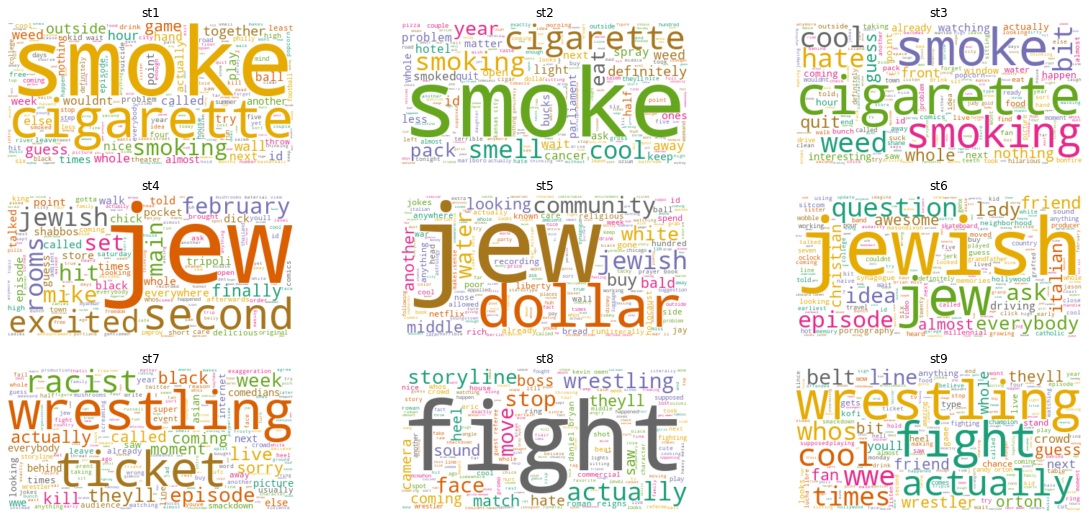

In [58]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=add_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 9]

full_names = ['Fighter_and_the_Kid', 'Two_Bears_One_Cave', 'Bad_Friends', 'This_Past_Weekend', 'Good_for_you', 
              'You_Up', 'Joe_Rogan_Experience', 'Church_of_whats_Happening_Now', 'Skeptic_Tank'] 
# Create subplots for each comedian


#for index, comedian in enumerate(data_clean.Transcript):
for index, comedian in enumerate(ari.index):

    wc.generate(c_df.Transcript[comedian])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)
   

plt.show()

In [57]:
ari=c_df.tail(9)

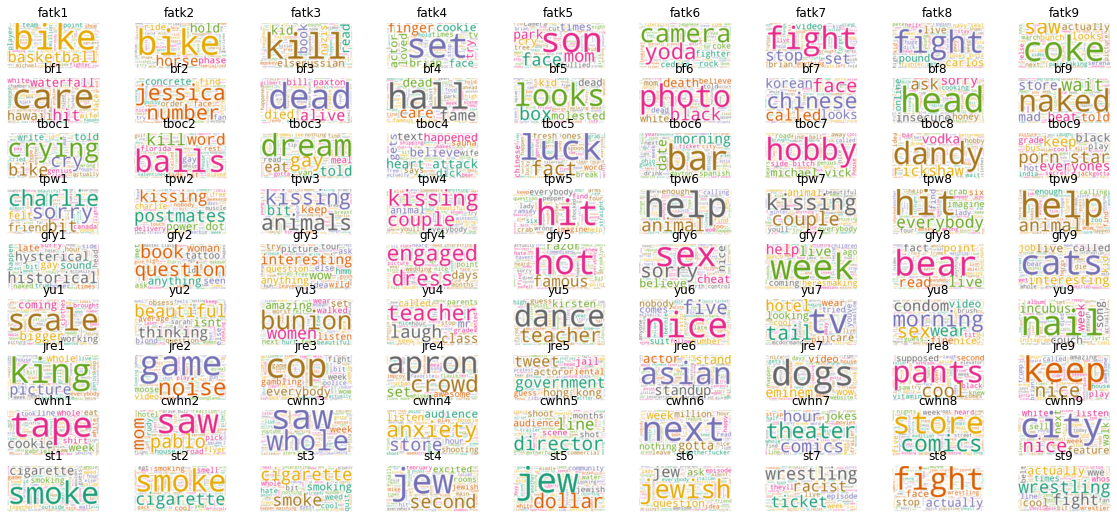

In [118]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=add_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 9]

full_names = ['Fighter_and_the_Kid', 'Two_Bears_One_Cave', 'Bad_Friends', 'This_Past_Weekend', 'Good_for_you', 
              'You_Up', 'Joe_Rogan_Experience', 'Church_of_whats_Happening_Now', 'Skeptic_Tank'] 
# Create subplots for each comedian


#for index, comedian in enumerate(data_clean.Transcript):
for index, comedian in enumerate(c_df.index):
    wc.generate(c_df.Transcript[comedian])
    plt.subplot(9, 9, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)

plt.show()

In [43]:
set(c_df['Names'])

{'2 Bears 1 Cave',
 'Bad Friends',
 'Church of whats Happening Now',
 'Fighter and the Kid',
 'Good For You',
 'Joe Rogan Experience',
 'Skeptic Tank',
 'This Past Weekend',
 'You Up'}

In [44]:
label=[['Fighter and the Kid','Bad Friends','2 Bears 1 Cave',
                             'This Past Weekend','Good For You','You Up','Church of whats Happening Now',
                             'Joe Rogan Experience','Skeptic Tank',]]

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8] # Set width to 10 inches and height to 8 inches

for index, comedian in enumerate(c_df.index):
    #print(comedian)
    x = c_df.Polarity.loc[comedian]
    y = c_df.Subjectivity.loc[comedian]
    plt.scatter(x, y)
    #plt.legend()
    #plt.text(x+.001, y+.001, c_df['Names'][index], fontsize=10) # Offset the label to avoid overlap of label & dot
    
    #plt.xlim(.04, .16) 
    #plt.ylim(.520, .56)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [324]:
import mpld3

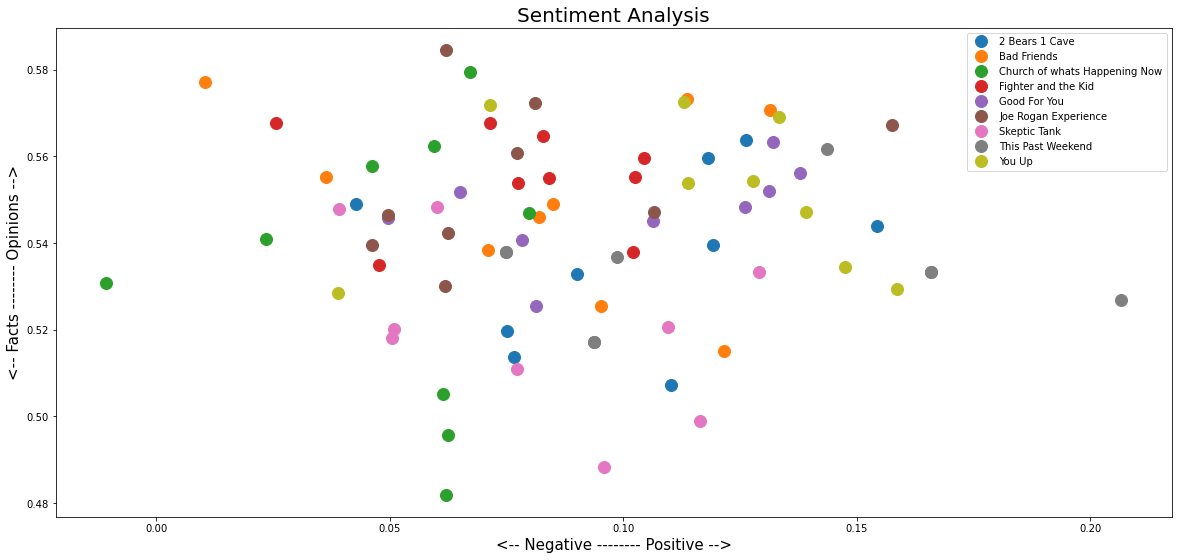

In [332]:
x=c_df.Polarity
y=c_df.Subjectivity
name=c_df.Names
df = pd.DataFrame(dict(x=x, y=y, label=names))

groups = df.groupby('label')

# Plot
#fig = plt.figure()
#ax = plt.axes(projection='3d')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

In [ ]:
fig = px.bar(comp_grp_df, x='portion', y='company', template='plotly_white', orientation='h',
             labels={'portion': '% of Complaints', 'bigram': 'Bigram', 'company': 'Company'},
             color='bigram', color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(font=dict(size=10, color='DarkSlateGray'))
fig.update_layout(width=1200, height=500)
fig.show()

import plotly.express as px

px.scatter(x=group.x, y=group.y)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



for name, group in groups:
    ax.scatter(group.x, group.x, group.y, marker='o',label=name, s=45)
ax.legend()
ax.set_xlabel('<-- Facts ------ Opinions -->')
ax.set_ylabel('<-- Facts ------ Opinions -->')
ax.set_zlabel('<--Negative---Positive-->')

plt.show()

In [35]:
from gensim import matutils, models
import scipy.sparse
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
from gensim import corpora

In [36]:
pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency) 

pyLDAvis.prepare(10, doc_topic_dists, doc_lengths, vocab, term_frequency) 
n_components 
doc_topics (output of nmf fit.transform) 
cv_output.. sum(axis=) 
get_featurenames 
cv_output.. sum(axis=) 

SyntaxError: invalid syntax (<ipython-input-36-1d2809b0f70d>, line 5)

In [37]:
pyLDAvis.prepare(n_components=10, nmf

SyntaxError: unexpected EOF while parsing (<ipython-input-37-848336522bbc>, line 1)

In [38]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(nmf, tfidf, vectorizer)
panel

/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/home/eliza/miniconda3/envs/metis/lib/python3.8/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.089629 -0.039310       1        1  21.195825
8      0.085040 -0.021475       2        1  19.867362
5      0.118678 -0.018878       3        1  15.713284
0      0.080531  0.017406       4        1  13.570026
7      0.130480 -0.016040       5        1   6.268496
2      0.082315  0.034146       6        1   5.978565
4     -0.229126  0.071692       7        1   4.724145
3     -0.203471 -0.296688       8        1   4.693023
6      0.105648  0.086030       9        1   4.463198
1     -0.259723  0.183115      10        1   3.526076, topic_info=            Term      Freq     Total Category  logprob  loglift
10459      smoke  2.000000  2.000000  Default  30.0000  30.0000
1989   cigarette  1.000000  1.000000  Default  29.0000  29.0000
5898         jew  1.000000  1.000000  Default  28.0000  28.0000
12610    wrestle  1.000000  1.000000  Default  27.0000  27.0000
421       animal  1.000000  1.000000  Default  26.0000  26.0000
...          ...       ...       ...      ...      ...      ...
478      anxiety  0.273581  0.848409  Topic10  -5.3331   2.2132
579          arm  0.270711  0.863933  Topic10  -5.3436   2.1845
4617        glad  0.271126  0.873635  Topic10  -5.3421   2.1749
1294         boy  0.291820  1.748729  Topic10  -5.2686   1.5545
6254        lady  0.248365  1.017816  Topic10  -5.4298   1.9345

[1016 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
344        1  0.794908      amaze
421        7  0.549854     animal
421        8  0.549854     animal
484        2  1.160754     anyone
693        3  1.018912   audience
1066       1  0.797993       bike
1237       3  0.668295       book
1481       2  1.912965     bunion
1859       2  1.090000      cheat
1989       6  1.040800  cigarette
2094       3  0.562546       club
2212       3  0.890179      comic
2542      10  1.391433       crab
2647       4  0.842930        cry
2721       4  0.755461        dad
2783       2  0.925226       date
2810       4  0.821769       dead
3352       2  1.233210      dress
3663       2  1.457097     engage
4101       1  0.564739      fight
4101       5  0.564739      fight
4467       1  1.197448     gamble
4469       1  0.663214       game
5648       2  1.130528  instagram
5687       2  0.610037   interest
5898       9  1.100481        jew
5901       9  0.933184     jewish
6488       3  0.771909       line
6508       2  0.592010     listen
6508       3  0.592010     listen
7364       3  0.417573      movie
7364       4  0.417573      movie
8299      10  1.748261     pepper
9811       2  1.760823      scale
10047      3  0.661085        set
10067      2  0.693897        sex
10192      3  0.653215      shoot
10424      8  1.395355      sloth
10459      6  1.055381      smoke
10639      2  0.517292    special
10755      3  0.541689      stage
10894      3  0.766303      store
10898      5  1.936639  storyline
11265      2  1.261517    teacher
11268      1  1.142287       team
11352      1  1.020296       test
11372      3  1.157008    theater
11642      1  1.265597      train
11738      2  0.925720       true
11742      1  1.327963      trump
12176      1  0.728635      video
12356      2  0.568950       wear
12370      6  1.224496       weed
12522      7  1.574841     winter
12552      2  0.481060      woman
12610      5  0.724997    wrestle
12613      5  1.879318   wrestler
12628      5  1.983167        wwe
12760      8  1.140208        zoo, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 6, 1, 8, 3, 5, 4, 7, 2])

In [60]:
text_list = [i.split() for i in c_df['TranLem']]
text_list

[['good',
  'news',
  'everybody',
  'this',
  'week',
  'on',
  'it',
  'have',
  'off',
  'all',
  'their',
  'supplement',
  'mouth',
  'brand',
  'alpha',
  'brain',
  'instant',
  'you',
  'have',
  'new',
  'mood',
  'melatonin',
  'spray',
  'you',
  'get',
  'problem',
  'with',
  'you',
  'get',
  'they',
  'get',
  'total',
  'gut',
  'health',
  'you',
  'get',
  'ot',
  'powder',
  'dude',
  'the',
  'protein',
  'powder',
  'creatine',
  'off',
  'and',
  'i',
  'know',
  'a',
  'lot',
  'of',
  'you',
  'boy',
  'plan',
  'that',
  'quarantine',
  'shred',
  'that',
  'weight',
  'man',
  'let',
  'on',
  'it',
  'help',
  'off',
  'this',
  'week',
  'only',
  'go',
  'to',
  'on',
  'it',
  'com',
  'fighter',
  'an',
  'additional',
  'off',
  'off',
  'and',
  'then',
  'theyre',
  'give',
  'off',
  'supplement',
  'say',
  'what',
  'what',
  'want',
  'com',
  'fighter',
  'not',
  'many',
  'men',
  'can',
  'withstand',
  'my',
  'punch',
  'punch',
  'obviously'

text_list2=[]
for group in text_list:  # iterating on a copy since removing will mess things up
    text_listt=[]
    for word in group:
        if word not in all_stopwords:
            text_listt.append(word)
    text_list2.append(text_listt)

dictionary = corpora.Dictionary(text_list2)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

ldamod = models.LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

check = pyLDAvis.gensim.prepare(ldamod, doc_term_matrix, dictionary)
check

In [74]:

text_list2=[]
for group in text_list:  # iterating on a copy since removing will mess things up
    text_listt=[]
    for word in group:
        if word not in add_stop_words:
            text_listt.append(word)
    text_list2.append(text_listt)

In [107]:
c=Counter(checkcheck).most_common(40)

In [89]:
text_list3=[]
for t in text_list2:
    text_list3.append(t)

In [102]:
lst=[]
hst=[]
for item in c:
    lst.append(item[0])
for i in text_list3:
    for w in i:
        if w in lst:
            hst.append(i)

In [105]:
import itertools

checkcheck=list(itertools.chain.from_iterable(text_list3))

In [111]:
counts = dict(Counter(checkcheck).most_common(40))

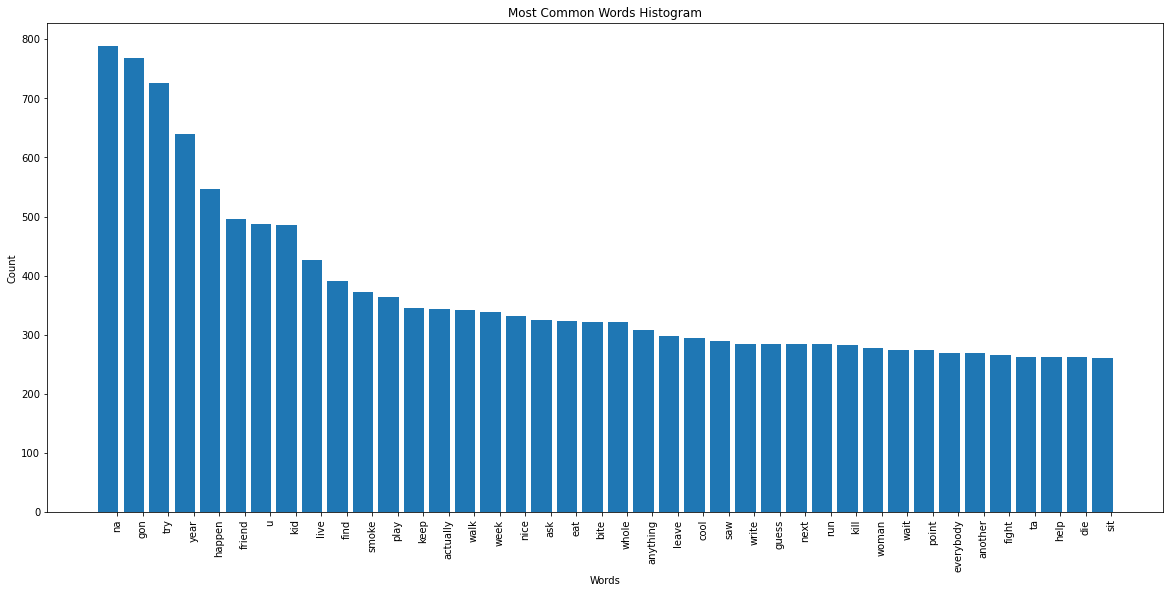

In [117]:
labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels, rotation=90)
plt.title('Most Common Words Histogram')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [276]:
from gensim.corpora.dictionary import Dictionary

# NMF count vectorize

count_vectorizer = CountVectorizer(stop_words=all_stopwords, token_pattern="\\b[a-z][a-z]+\\b", max_df=.75, min_df=.01)

cvd=count_vectorizer.fit_transform(c_df.TranLem)

nmf2 = NMF(n_components=10, random_state=21).fit_transform(cvd)

n_top_words = 10
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(", ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [49]:
c_df2=c_df[['Names','Topic']]

In [52]:
c_df2.to_csv('c_df.csv')

In [126]:
n=['2 Bears 1 Cave',
 'Bad Friends',
 'Church of whats Happening Now',
 'Fighter and the Kid',
 'Good For You',
 'Joe Rogan Experience',
 'Skeptic Tank',
 'This Past Weekend',
 'You Up']
wm=[186, 195, 189, 198, 197,191, 190, 155, 201]
df=pd.DataFrame()

In [127]:
df['Podcast']=n

In [128]:
df['Word Per Minute']=wm

In [133]:
df.sort_values(by=['Word Per Minute'])

Podcast  Word Per Minute
7              This Past Weekend              155
0                 2 Bears 1 Cave              186
2  Church of whats Happening Now              189
6                   Skeptic Tank              190
5           Joe Rogan Experience              191
1                    Bad Friends              195
4                   Good For You              197
3            Fighter and the Kid              198
8                         You Up              201

Text(0, 0.5, 'Polarity Percentage')

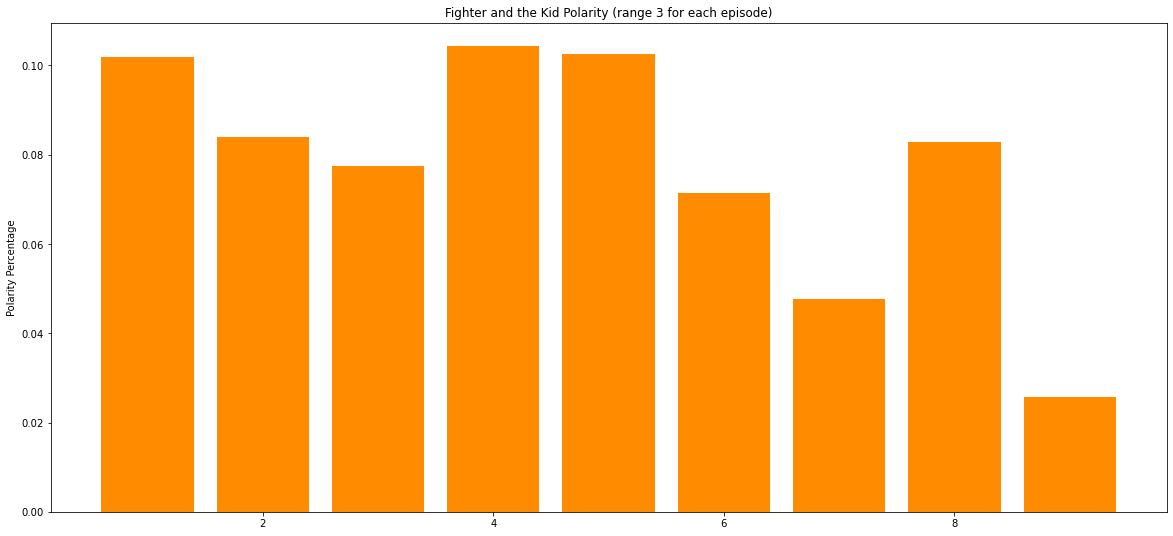

In [179]:
#fig
y=c_df.Polarity[:9]
x=[1,2,3,4,5,6,7,8,9]
plt.bar(x,y, color='DarkOrange')
plt.title('Fighter and the Kid Polarity (range 3 for each episode)')
plt.ylabel('Polarity Percentage')

Text(0, 0.5, 'Subjectivity Percentage')

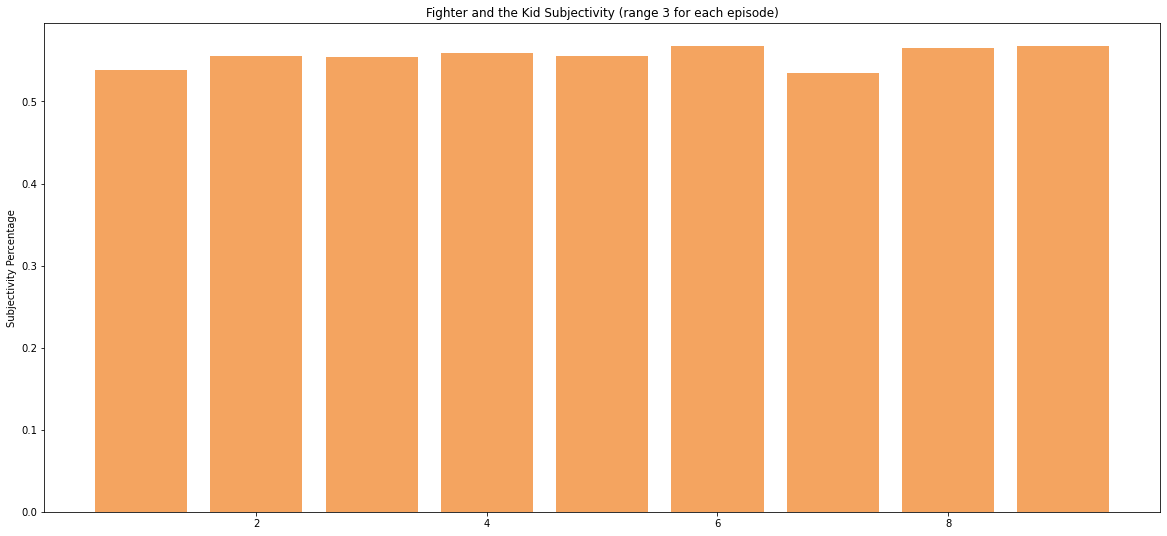

In [177]:
y=c_df.Subjectivity[0:9]
x=[1,2,3,4,5,6,7,8,9]
plt.bar(x,y, color='#F4A460')
plt.title('Fighter and the Kid Subjectivity (range 3 for each episode)')
plt.ylabel('Subjectivity Percentage')

Text(0, 0.5, 'Polarity Percentage')

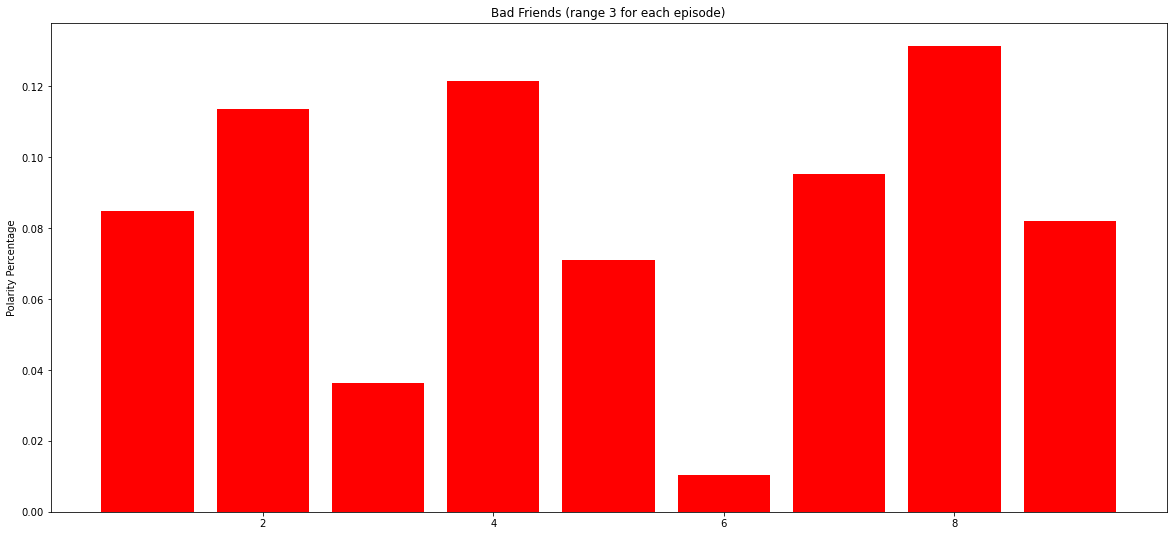

In [167]:
#bf
y=c_df.Polarity[9:18]
x=[1,2,3,4,5,6,7,8,9]
plt.bar(x,y, color='red')
plt.title('Bad Friends (range 3 for each episode)')
plt.ylabel('Polarity Percentage')

Text(0, 0.5, 'Subjectivity Percentage')

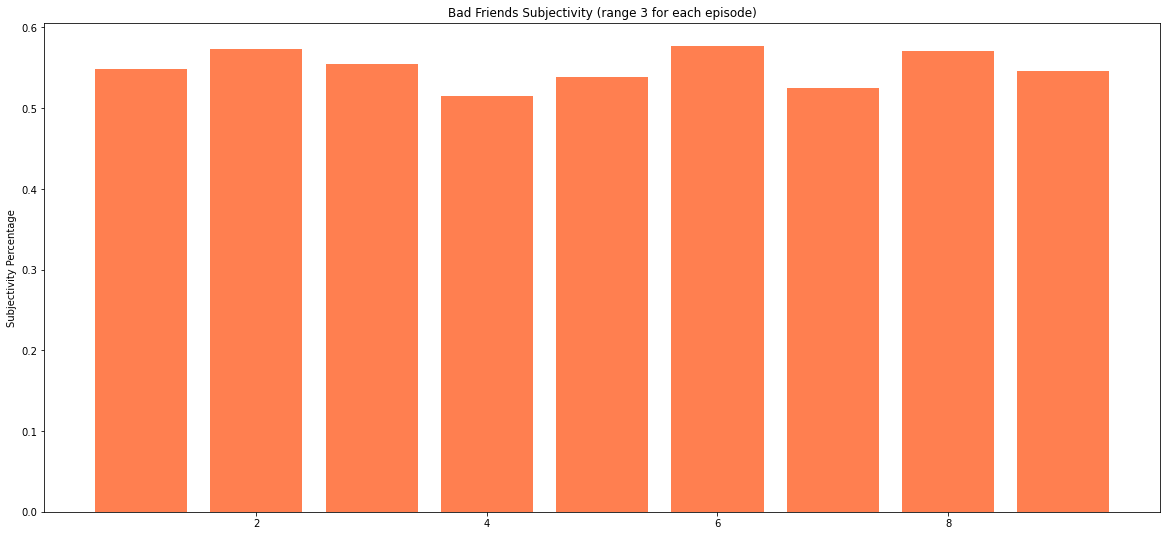

In [173]:
y=c_df.Subjectivity[9:18]
x=[1,2,3,4,5,6,7,8,9]
plt.bar(x,y, color='coral')
plt.title('Bad Friends Subjectivity (range 3 for each episode)')
plt.ylabel('Subjectivity Percentage')